# Notebook to balance corpus

In [6]:
import setup_corpus

In [9]:
import random
import pandas as pd
import nltk
from nltk.corpus import treebank
#Encounter some errors when we downloaded treebank, so use ssl
import ssl
try:
    _create_unverified_https_context=ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
nltk.download('treebank')
#----------Download End-------------------

categories = ('extended_description', 'extended_installation', 'extended_invocation', 'extended_citation')


def build_corpora():
    corpora = {}
    for cat in categories:
        corpora[cat] = build_corpus(cat)
    return corpora

def build_corpus(selected_category):
    categories_df = {cat : pd.read_csv(f"./training_corpus/{cat}.csv") for cat in categories}
    negative_sample_size = int(len(categories_df[selected_category]) / 4)
    print(f"Selected Category: {selected_category}")
    for category in categories_df:
        categories_df[category].drop('URL', 1, inplace=True)
        if category != selected_category:
            categories_df[category] = categories_df[category].sample(negative_sample_size)
        categories_df[category] = categories_df[category].assign(**{selected_category: category == selected_category})
        print("{} has {} samples;".format(category, len(categories_df[category])))
        #print(categories_df[category].head())
    treebank_background = pd.DataFrame(map(lambda sent: ' '.join(sent), random.sample(list(treebank.sents()), negative_sample_size)), columns=["excerpt"]).assign(description=False)
    #print("Treebank has {} samples.".format(len(treebank_background)))
    #print("categories_df")
    corpus = pd.concat(categories_df.values(), ignore_index=True, sort=False)
    corpus.append(treebank_background, ignore_index=True, sort=False)
    corpus.fillna(value='', inplace=True)
    return corpus
    


[nltk_data] Downloading package treebank to
[nltk_data]     /Users/yidanzhang/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


In [10]:
corpus =build_corpora()

Selected Category: extended_description
extended_description has 414 samples;
extended_installation has 103 samples;
extended_invocation has 103 samples;
extended_citation has 103 samples;
Selected Category: extended_installation
extended_description has 274 samples;
extended_installation has 1096 samples;
extended_invocation has 274 samples;
extended_citation has 274 samples;
Selected Category: extended_invocation
extended_description has 380 samples;
extended_installation has 380 samples;
extended_invocation has 1523 samples;
extended_citation has 380 samples;
Selected Category: extended_citation
extended_description has 102 samples;
extended_installation has 102 samples;
extended_invocation has 102 samples;
extended_citation has 409 samples;


In [11]:
corpus['extended_installation']

,Unnamed: 0,contributor,excerpt,extended_installation
0,57,Allen Mao,I hope you enjoy using HyVR much more than I e...,False
1,324,Rosna Thomas,"algorithms for generating songs, images, drawi...",False
2,355,Pratheek,Sequence taggers,False
3,293,Rosna Thomas,A bot which scrapes almost everything about a ...,False
4,174,Allen Mao,tiles server for live feedback when coding,False
5,380,Sharad,"With the cv method, stratified is set to false",False
6,394,Yi Xie,EventHub enables companies to do cross device ...,False
7,237,Allen Mao,Filtering/plotting tools built for interactivi...,False
8,98,Allen Mao,Most numerical formats (including IEEE 4- and ...,False
9,370,Pratheek,Delegator.py is a simple library for dealing w...,False


In [12]:
corpus['extended_citation'].drop(columns=['Unnamed: 0'],inplace=True)

In [13]:
corpus['extended_citation']

,contributor,excerpt,extended_citation
0,Allen Mao,construction and interactive editing of spatia...,False
1,Allen Mao,Multivariate method and Parameter Optimization,False
2,Rosna Thomas,the About us &lt;http://scikit-learn.org/dev/a...,False
3,Yi Xie,"Apache ECharts (incubating) is a free, powerfu...",False
4,Allen Mao,A scene graph is a structured representation o...,False
5,Allen Mao,FGFA is end-to-end trainable for the task of v...,False
6,Allen Mao,This repository contains a PyTorch implementat...,False
7,Allen Mao,Project goals,False
8,Pratheek,Text classifiers,False
9,Allen Mao,The goal of Detectron is to provide a high-qua...,False


In [14]:
corpus['extended_description'].drop(columns=['Unnamed: 0'],inplace=True)

In [15]:
corpus['extended_description']

,contributor,excerpt,extended_description
0,Allen Mao,Puppeteer is a Node library which provides a h...,True
1,Allen Mao,The major contributors of this repository incl...,True
2,Allen Mao,Integral Regression is initially described in ...,True
3,Allen Mao,We build a 3D pose estimation system based mai...,True
4,Allen Mao,The Integral Regression is also known as soft-...,True
5,Allen Mao,This is an official implementation for Integra...,True
6,Allen Mao,The original implementation is based on our in...,True
7,Allen Mao,LibGEOS is a LGPL-licensed package for manipul...,True
8,Allen Mao,"Among other things, it allows you to parse Wel...",True
9,Allen Mao,This repository contains the experiments in th...,True


In [16]:
corpus['extended_invocation'].drop(columns=['Unnamed: 0'],inplace=True)

In [17]:
corpus['extended_invocation']

,contributor,excerpt,extended_invocation
0,Allen Mao,Each branch in the git repository corresponds ...,False
1,Sharad,lakeFS is an open source layer that delivers r...,False
2,Pratheek,Core PyText features:\n\n,False
3,Allen Mao,Official implementation of Fast End-to-End Tra...,False
4,Allen Mao,TensorFlow is an open source software library ...,False
5,Allen Mao,This software takes as input a polygon mesh an...,False
6,Allen Mao,Direct access to mesh analysis and transformat...,False
7,Allen Mao,gprMax is open source software that simulates ...,False
8,Allen Mao,"Among other things, it allows you to parse Wel...",False
9,Allen Mao,Segyio is a small LGPL licensed C library for ...,False


# Distribution of Data

# For Invocation

In [18]:
corpus['extended_invocation']['extended_invocation'].value_counts()

True     1523
False    1140
Name: extended_invocation, dtype: int64

# For Installation

In [19]:
corpus['extended_installation']['extended_installation'].value_counts()

True     1096
False     822
Name: extended_installation, dtype: int64

# For Citation

In [20]:
corpus['extended_citation']['extended_citation'].value_counts()

True     409
False    306
Name: extended_citation, dtype: int64

# For Description

In [21]:
corpus['extended_description']['extended_description'].value_counts()

True     414
False    309
Name: extended_description, dtype: int64

# Bar Plots

# Extended Installation

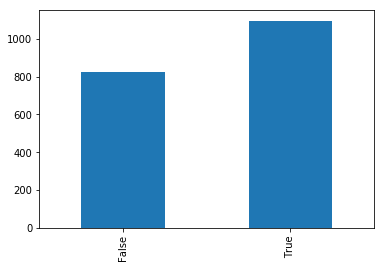

In [23]:
corpus['extended_installation']['extended_installation'].value_counts().sort_values().plot(kind = 'bar')

# Extended Invocation

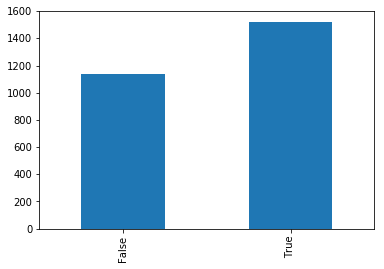

In [24]:
corpus['extended_invocation']['extended_invocation'].value_counts().sort_values().plot(kind = 'bar')

# Extended Description

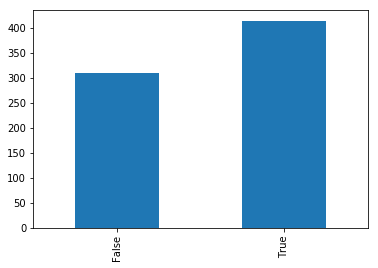

In [25]:
corpus['extended_description']['extended_description'].value_counts().sort_values().plot(kind = 'bar')

# Exteneded Citation

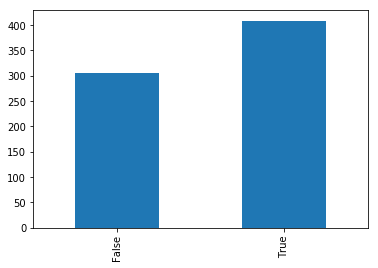

In [26]:
corpus['extended_citation']['extended_citation'].value_counts().sort_values().plot(kind = 'bar')